# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。


## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
#!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
#!rm -rf /home/featurize/.cache/matplotlib

#import matplotlib 
#import matplotlib.pyplot as plt
#matplotlib.rc("font",family='SimHei') # 中文字体


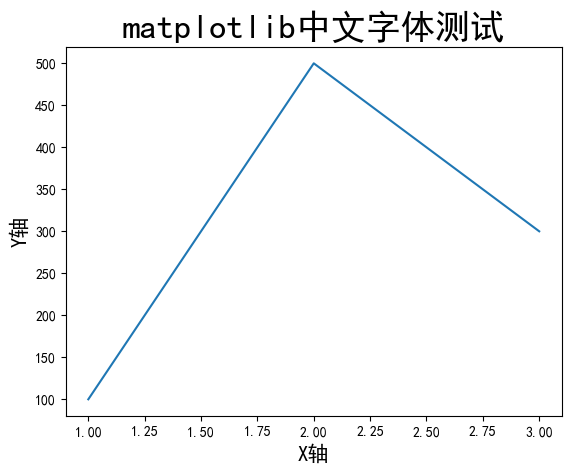

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('../mmsegmentation')

In [6]:
os.getcwd()

'F:\\openprj\\openmmlab\\mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [8]:
# 日志文件路径
log_path = 'work_dirs/WatermelonDataset/20230618_164041/vis_data/scalars.json'

In [9]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [10]:
len(json_list)

37

In [11]:
eval(json_list[4])

{'aAcc': 77.17,
 'mIoU': 30.39,
 'mAcc': 36.66,
 'data_time': 0.0020235538482666015,
 'time': 1.000400471687317,
 'step': 400}

In [14]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [15]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.009978,0.004597,0.070999,0.048894,78.982544,0.022106,84.075928,0.396274,3773.0,100.0
1,0.009956,0.002907,0.070916,0.049309,78.790283,0.021607,71.545410,0.391626,3773.0,200.0
2,0.009933,0.004515,0.057149,0.040340,75.082397,0.016809,80.535889,0.396631,3773.0,300.0
3,0.009911,0.004500,0.064511,0.045709,83.215332,0.018802,83.941650,0.395258,3773.0,400.0
4,0.009889,0.004815,0.053202,0.037905,76.074219,0.015297,76.922607,0.393436,3773.0,500.0
5,0.009866,0.004038,0.059446,0.043067,75.851440,0.016378,78.460693,0.392008,3773.0,600.0
6,0.009844,0.004426,0.045284,0.032096,93.872070,0.013188,93.127441,0.394750,3773.0,700.0
7,0.009822,0.004208,0.041730,0.028803,82.296753,0.012927,79.437256,0.394146,3773.0,800.0
8,0.009800,0.003966,0.039809,0.027619,91.036987,0.012189,88.909912,0.393860,3773.0,900.0
9,0.009777,0.004436,0.042922,0.029852,76.623535,0.013070,75.732422,0.394159,3773.0,1000.0


In [16]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,77.17,30.39,36.66,0.002024,1.000400,400.0
1,72.17,33.53,42.70,0.003181,0.301038,800.0
2,86.24,44.13,49.63,0.002737,0.300659,1200.0
3,85.73,47.70,52.86,0.003232,0.302029,1600.0
4,88.80,52.71,57.78,0.003373,0.301780,2000.0
5,86.06,48.32,53.21,0.003115,0.301184,2400.0
6,89.70,57.98,63.51,0.002597,0.300276,2800.0


## 导出训练日志表格

In [17]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [18]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [19]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

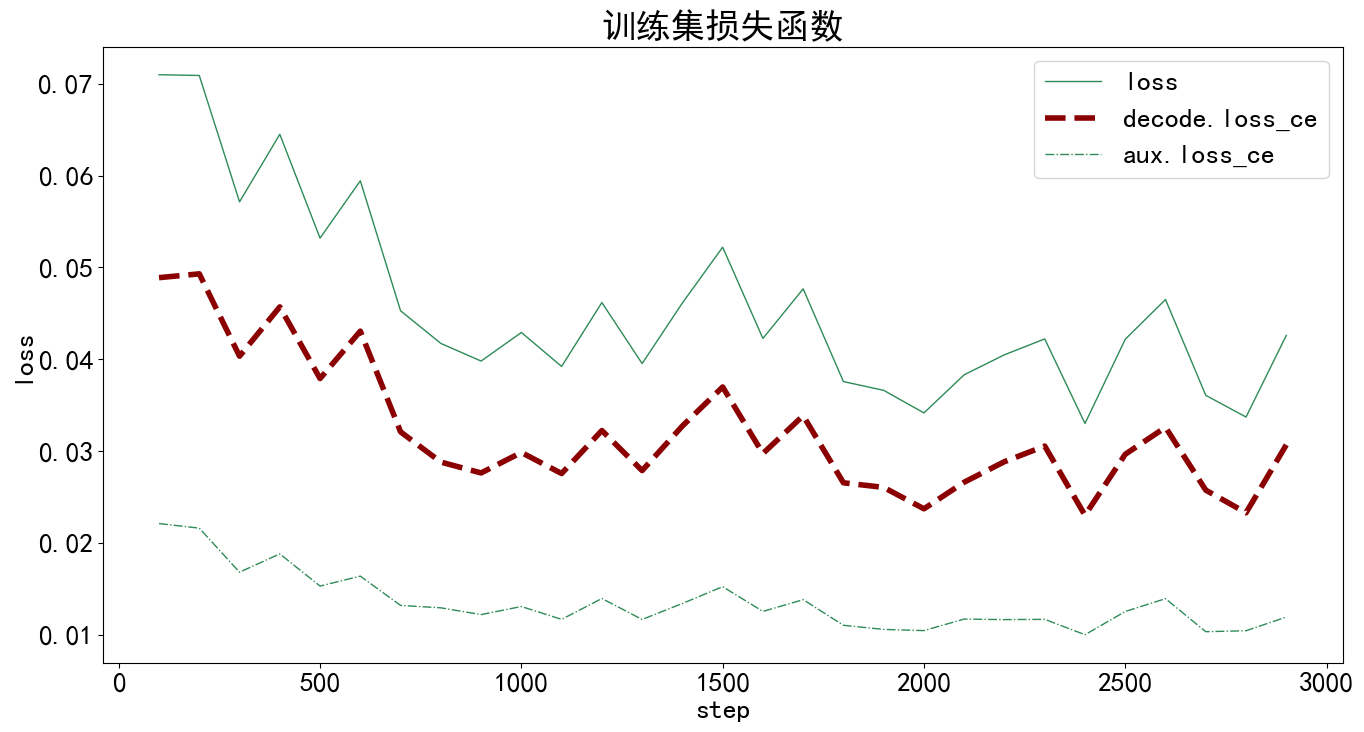

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [21]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [22]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

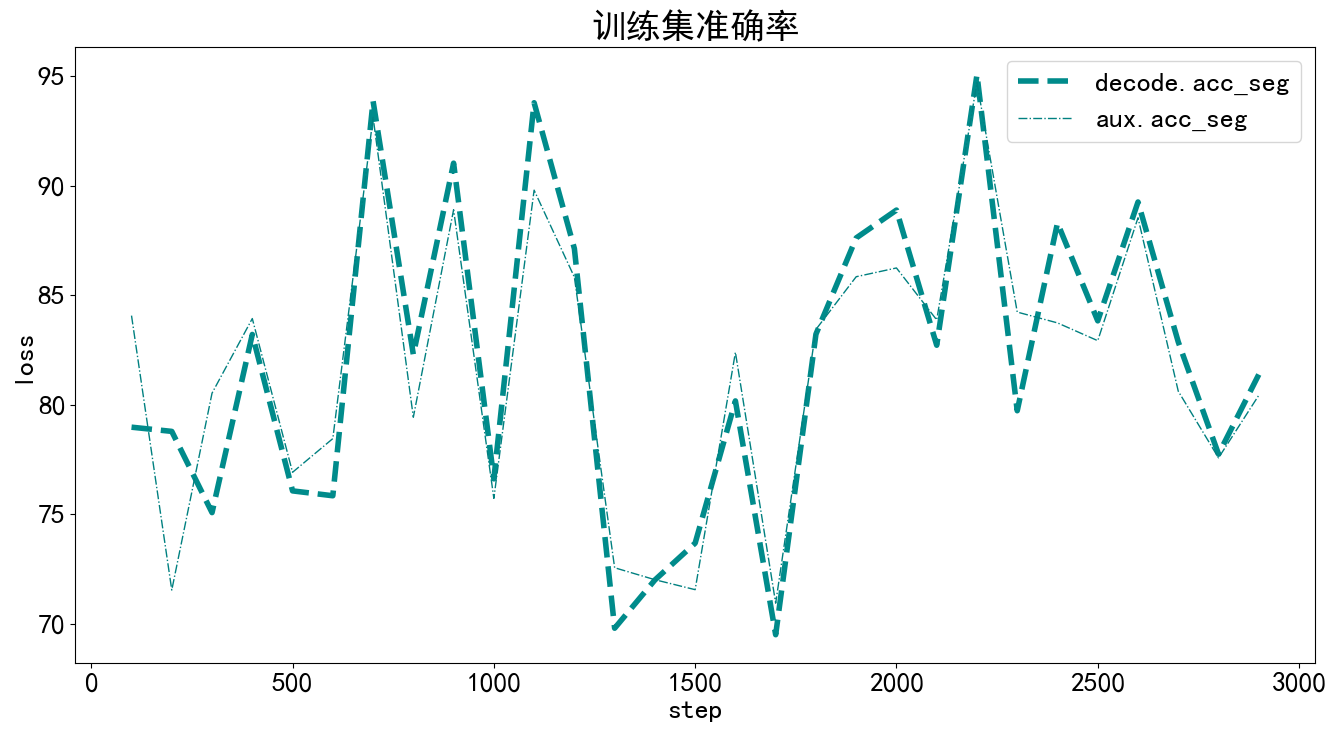

In [23]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [24]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [25]:
metrics = ['aAcc', 'mIoU', 'mAcc']

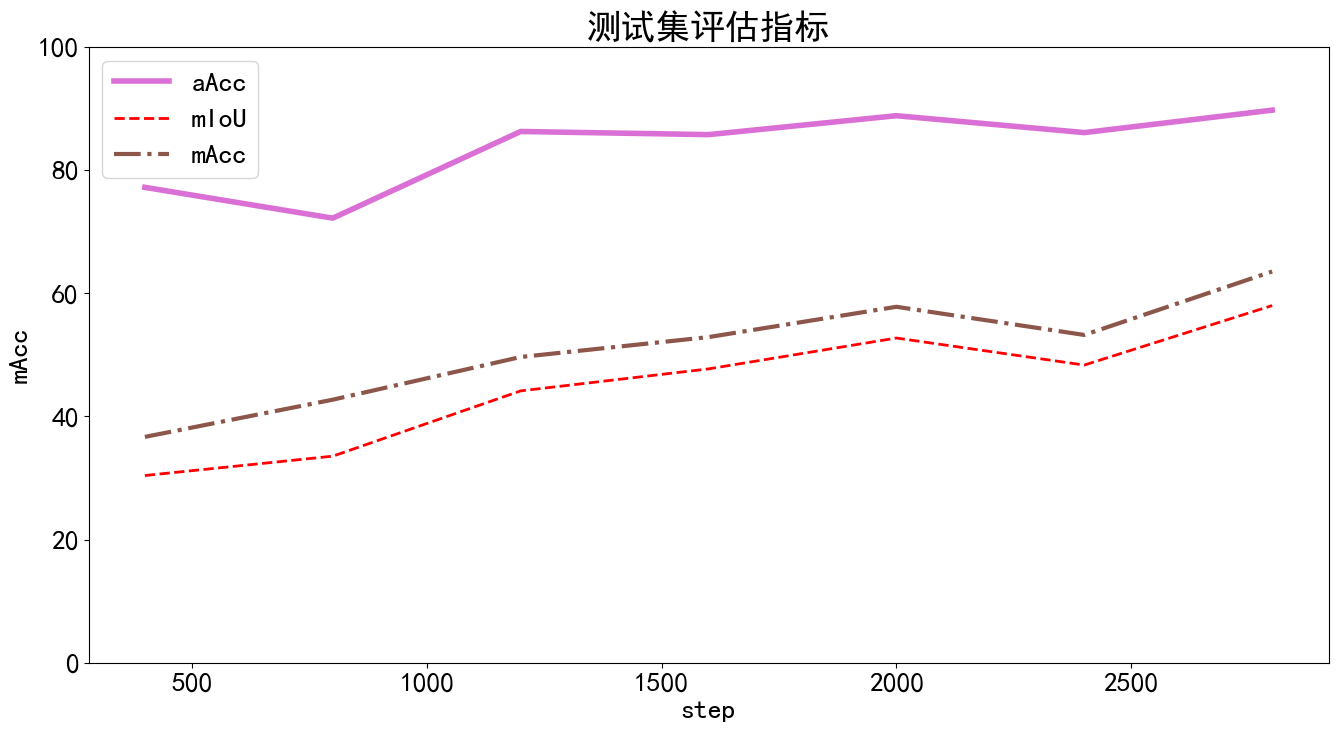

In [26]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()